# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df= pd.read_csv('SINASC_RO_2019.csv')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [8]:
# Definindo os intervalos e rótulos para categorização
intervalos = [0, 3, 5, 7, 10]
rotulos = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']

# Categorizando a variável APGAR5
df['APGAR5_categorizada'] = pd.cut(df['APGAR5'], bins=intervalos, labels=rotulos, include_lowest=True)
df['APGAR5_categorizada']

0        normal
1        normal
2        normal
3        normal
4        normal
          ...  
27023    normal
27024    normal
27025    normal
27026    normal
27027    normal
Name: APGAR5_categorizada, Length: 27028, dtype: category
Categories (4, object): ['asfixia grave' < 'asfixia moderada' < 'asfixia leve' < 'normal']

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

<Axes: xlabel='GESTACAO', ylabel='APGAR5'>

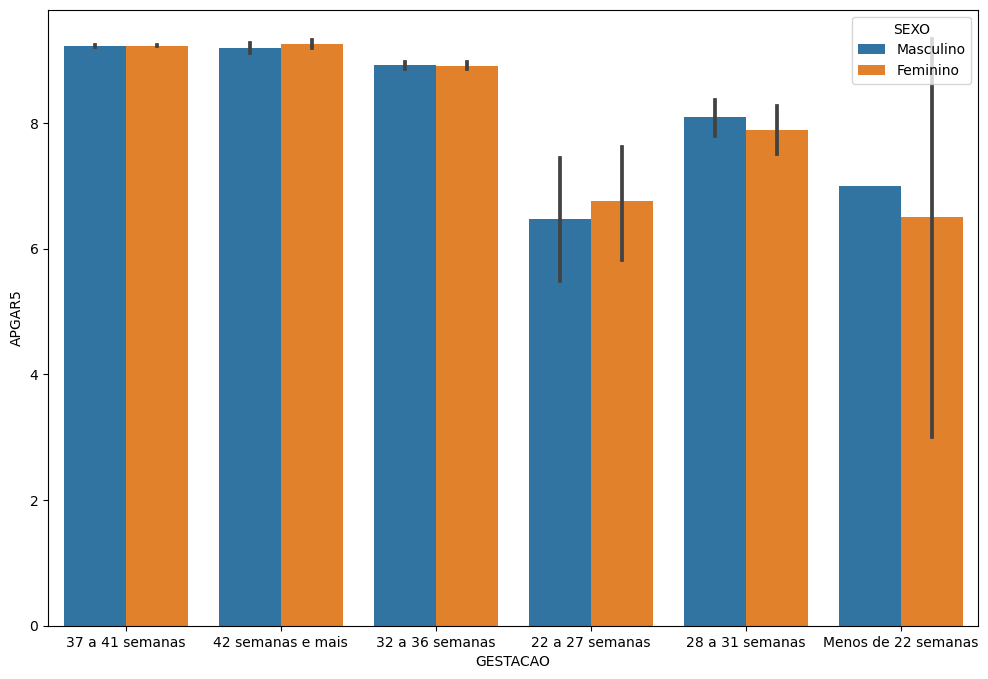

In [10]:
# Criando o gráfico de caixas (boxplot) para comparar APGAR5 por sexo para cada grupo de tempo de gestação
plt.figure(figsize=(12, 8))
sns.barplot(x='GESTACAO', y='APGAR5', hue='SEXO', data=df)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [12]:
# Montando uma tabela cruzada com os dados de APGAR5 categorizados
tabela_cruzada = pd.crosstab(df['GESTACAO'], df['APGAR5_categorizada'])
tabela_cruzada

APGAR5_categorizada,asfixia grave,asfixia moderada,asfixia leve,normal
GESTACAO,,,,
22 a 27 semanas,21,1,12,51
28 a 31 semanas,3,12,18,129
32 a 36 semanas,8,19,73,2134
37 a 41 semanas,33,28,196,22266
42 semanas e mais,1,1,6,690
Menos de 22 semanas,2,0,1,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [14]:
# Utilizando uma função anonima para calcular a porcentagem da tabela cruzada
porcentagem_tabela_cruzada = tabela_cruzada.apply(lambda r: r/r.sum(), axis=1) * 100
porcentagem_tabela_cruzada

APGAR5_categorizada,asfixia grave,asfixia moderada,asfixia leve,normal
GESTACAO,,,,
22 a 27 semanas,24.705882,1.176471,14.117647,60.000000
28 a 31 semanas,1.851852,7.407407,11.111111,79.629630
32 a 36 semanas,0.358102,0.850492,3.267681,95.523724
37 a 41 semanas,0.146517,0.124317,0.870222,98.858944
42 semanas e mais,0.143266,0.143266,0.859599,98.853868
Menos de 22 semanas,28.571429,0.000000,14.285714,57.142857


In [16]:
# Conferindo se a soma está em 100%
porcentagem_tabela_cruzada.sum(axis=1)

GESTACAO
22 a 27 semanas        100.0
28 a 31 semanas        100.0
32 a 36 semanas        100.0
37 a 41 semanas        100.0
42 semanas e mais      100.0
Menos de 22 semanas    100.0
dtype: float64

<Axes: xlabel='GESTACAO'>

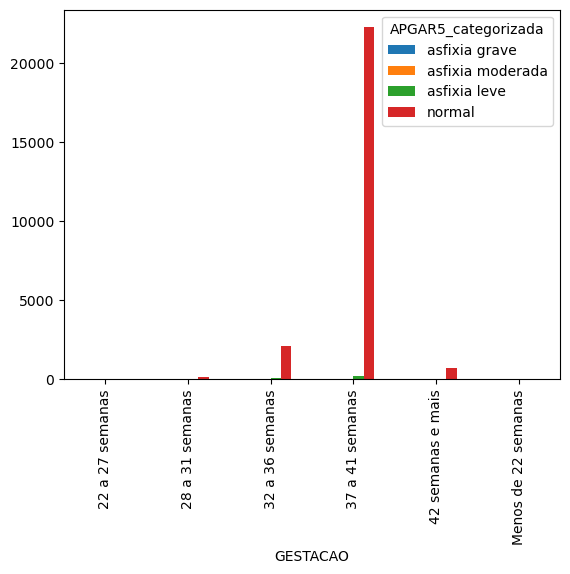

In [18]:
# Montando um gráfico da distribuição da tabela cruzada
tabela_cruzada.plot(kind='bar')

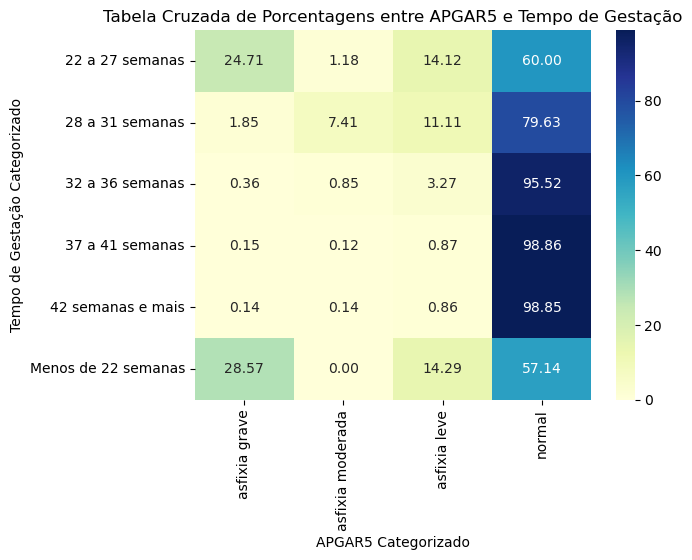

In [20]:
# Plotando mais um gráfico para melhor visualização das porcentagens
sns.heatmap(porcentagem_tabela_cruzada, annot=True, fmt=".2f", cmap="YlGnBu")
plt.xlabel('APGAR5 Categorizado')
plt.ylabel('Tempo de Gestação Categorizado')
plt.title('Tabela Cruzada de Porcentagens entre APGAR5 e Tempo de Gestação')
plt.show()

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

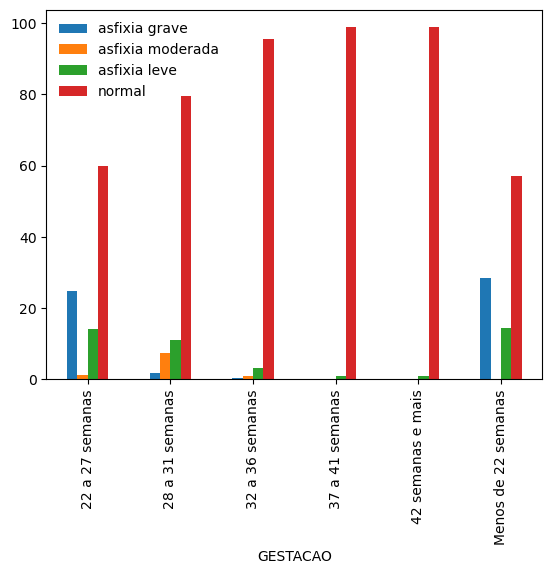

In [22]:
# Montando um gráfico da distribuição em porcentagem da tabela cruzada
porcentagem_tabela_cruzada.plot(kind='bar').legend(loc='upper left', frameon = False)

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

In [24]:
# Verificando a quantidade de valores únicos na coluna Peso
df['PESO'].nunique()

1476

In [26]:
# Verificando a correlação entre
correlation = round(df['APGAR5'].corr(df['PESO']), 3)
print('Correlação entre APGAR5 e PESO:', correlation)

Correlação entre APGAR5 e PESO: 0.168


<Axes: xlabel='APGAR5', ylabel='PESO'>

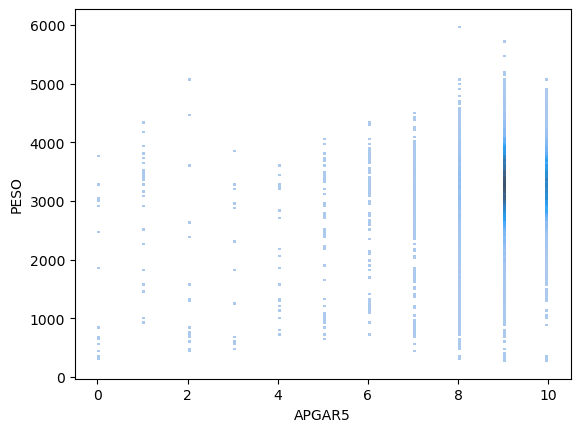

In [28]:
sns.histplot(x='APGAR5', y='PESO', data=df)

<Axes: xlabel='APGAR5', ylabel='PESO'>

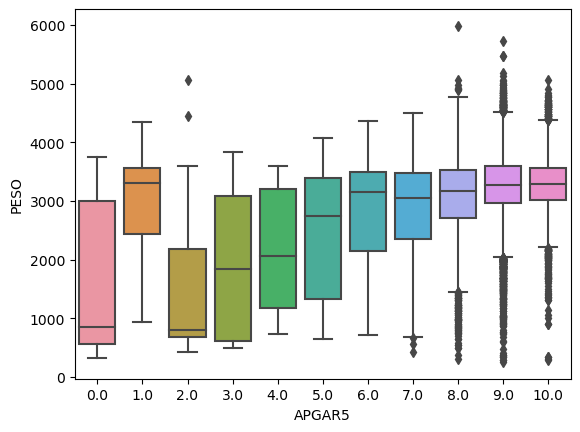

In [30]:
sns.boxplot(x='APGAR5', y='PESO', data=df)